In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline

In [64]:
borrow_data=pd.read_table(r'E:\BaiduNetdiskDownload\jzzz\train\borrow_train.txt', sep = ',',   #用dataframe的形式读取文件
                          names = ['user_id', 'date', 'book', 'isbn'],
                          encoding='utf-8',header=None)
borrow_data.head()

,user_id,date,book,isbn
0,9708,2014/2/25,我的英语日记 wo de ying yu ri ji / (韩)南银英著 (韩)卢炫廷插图,H315 502
1,6956,2013/10/27,解读联想思维 jie du lian xiang si wei : 联想教父柳传志,K825.38=76 547
2,23939,2015/3/8,电路分析 dian lu fen xi 刘健主编,TM133-43 56
3,22047,2014/12/29,现代物流学 xian dai wu liu xue = Contemporary logis...,F252 161
4,9076,2014/3/28,"公司法 gong si fa = = Corporation law / 范健, 王建文著 eng",NaN


In [3]:
borrow_data.shape

(227328, 4)

In [4]:
#按‘user_id’进行排序
borrow_data=borrow_data.sort_values(by=['user_id'],ascending=True)
#存在重复值，如果去重
#borrow_data.drop_duplicates(['User_id','Date','Book'],keep='last',inplace=True)
borrow_data.head()

,user_id,date,book,isbn
213278,11,2015/5/18,地铁2033 di tie 2033 / (俄) 德米特里·格鲁科夫斯基著 孙越译,I512.45 G695
92710,11,2015/5/18,地铁2034 di tie 2034 / (俄) 德米特里·格鲁克夫斯基著 李悠然译;Me...,I512.455 G695
92709,11,2015/5/18,地铁2033 di tie 2033 / (俄) 德米特里·格鲁科夫斯基著 孙越译,I512.45 G695
213277,11,2015/5/18,地铁2034 di tie 2034 / (俄) 德米特里·格鲁克夫斯基著 李悠然译;Me...,I512.455 G695
14858,20,2013/9/22,朗文外研社新概念英语 lang wen wai yan she xin gai nian y...,NaN


In [5]:
#开始绘制图书馆数据的相关图表：借书最多的人（以学号为x轴）
borrow_group=borrow_data.groupby(["user_id"])["book"].count().reset_index().sort_values("book",ascending=False)  
borrow_group[:10]#借书最多的前10个人

,user_id,book
4931,19149,426
1314,5666,371
4930,19148,342
3678,14685,325
2979,12199,319
1937,7999,303
1142,4978,282
4603,18046,260
1302,5617,255
4119,16242,253


In [6]:
lines=len(borrow_group[borrow_group['book']==1])
lines

142

In [34]:
#borrow_group1=borrow_group.sort_values('user_id')
#borrow_group1.head()

In [7]:
#计算借书的平均数与中位数
borrow_group['book'].describe()
#borrow_group['Book'].median()

count    7181.000000
mean       31.656872
std        36.092203
min         1.000000
25%         8.000000
50%        19.000000
75%        42.000000
max       426.000000
Name: book, dtype: float64

Text(0.5,1,'借书数量与人数分布图')

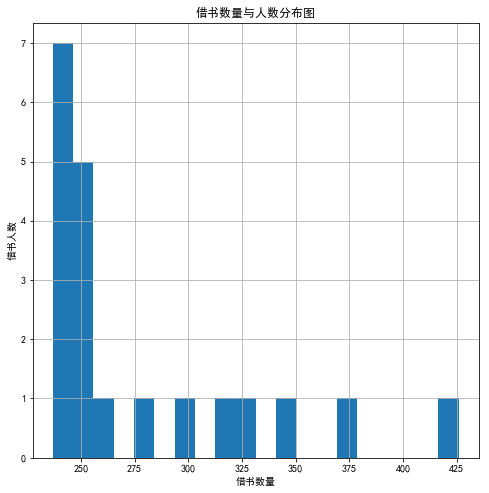

In [8]:
#画一个借书数量的直方图
fig = plt.figure()
ax = fig.add_subplot(111) 
ax=borrow_group['book'][:20].hist(bins=20,figsize=(8,8))
plt.xlabel('借书数量')
plt.ylabel('借书人数')
plt.title('借书数量与人数分布图')  #图有问题

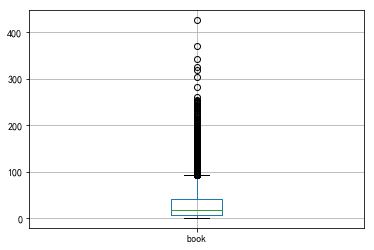

In [9]:
#画一个箱型图   异常值
borrow_group.boxplot(column='book')

In [10]:
score_data=pd.read_table(r'E:/BaiduNetdiskDownload/jzzz/train/score_train.txt', sep = ',', quotechar =',',
                          names = ['user_id','department','ranking',],
                          encoding='utf-8',header=None)
score_data.head()

,user_id,department,ranking
0,0,9,1
1,1,9,2
2,8,6,1565
3,9,6,1570
4,10,3,1


In [13]:
#将借书数量和成绩排名结合起来
book_ranking=pd.merge(borrow_group,score_data,how='inner')  
book_ranking.head(10)
#之前之所以合并不了是因为列名都不统一“User_id，user——id”
#合并之后基本匹配

,user_id,book,department,ranking
0,19149,426,11,30
1,5666,371,4,1523
2,19148,342,11,29
3,14685,325,6,37
4,12199,319,8,1106
5,7999,303,19,1880
6,4978,282,3,1743
7,18046,260,19,93
8,5617,255,4,1474
9,16242,253,4,53


In [14]:
book_ranking.to_csv('book_ranking.csv',sep=',')

In [15]:
#最受欢迎的10本书
jsph=borrow_data.groupby(['book']).count().reset_index().sort_values(['user_id'],ascending=False)  #计算累计的被借的次数
jsph[:10]

,book,user_id,date,isbn
19492,单人研修室 / 电子科技大学图书馆,5265,5265,5265
11678,三人研修室 San Ren Yan Xiu Shi / 电子科技大学图书馆,457,457,457
17751,六人研修室 / 电子科技大学图书馆,294,294,294
42407,狼图腾 lang tu teng 姜戎著,65,65,65
38247,果壳中的宇宙 guo ke zhong de yu zhou The universe in...,57,57,57
54999,货币战争 huo bi zhan zheng / 宋鸿兵编著,55,55,55
15385,优化建模与LINDO/LINGO软件 you hua jian mo yu LINDO/LI...,49,49,49
42394,狭义与广义相对论浅说 xia yi yu guang yi xiang dui lun qi...,45,45,0
44593,电路分析 dian lu fen xi 常青美主编 许庆和，林继河，刘明编著,45,45,45
36370,时间简史 shi jian jian shi The illustrated a brief...,43,43,43


In [16]:
#处理图书馆的出入时间数据
library_time=pd.read_table(r'E:/BaiduNetdiskDownload/jzzz/train/library_train.txt', sep = ',', quotechar =',',
                          names = ['user_id','door','time',],
                          encoding='utf-8',header=None)
library_time.head()

,user_id,door,time
0,3684,"""5""","""2013/09/01 08:42:50"""
1,14314,"""6""","""2013/09/01 08:42:59"""
2,5108,"""9""","""2013/09/01 08:43:32"""
3,5826,"""7""","""2013/09/01 08:44:06"""
4,7730,"""5""","""2013/09/01 08:44:25"""


In [25]:
#把time截取到天，一天内进出无论多少次只能算一天，要对其进行去重
library_time['time']=library_time['time'].str[:11]
library_time.drop_duplicates(['user_id','time'],keep='last',inplace=True)
library_time[:10]

,user_id,door,time
0,3684,"""5""","""2013/09/01"
4,7730,"""5""","""2013/09/01"
5,6668,"""7""","""2013/09/01"
7,4036,"""6""","""2013/09/01"
8,4050,"""5""","""2013/09/01"
9,7434,"""5""","""2013/09/01"
11,6956,"""6""","""2013/09/01"
13,3166,"""5""","""2013/09/01"
14,940,"""5""","""2013/09/01"
15,7548,"""7""","""2013/09/01"


In [27]:
#测试user_id唯一的同学的进出情况
library_time[library_time['user_id']==19149]

,user_id,door,time
297105,19149,"""出门4""","""2014/09/02"
301905,19149,"""出门3""","""2014/09/03"
322229,19149,"""出门3""","""2014/09/07"
327965,19149,"""出门3""","""2014/09/10"
331040,19149,"""出门3""","""2014/09/11"
338096,19149,"""出门2""","""2014/09/13"
341519,19149,"""出门2""","""2014/09/14"
350735,19149,"""出门1""","""2014/10/25"
353464,19149,"""出门1""","""2014/09/16"
354860,19149,"""出门2""","""2014/09/21"


In [29]:
#每个同学的在馆天数
library_time1=library_time.groupby(['user_id'])['time'].count().reset_index().sort_values(['time'],ascending=False)
library_time1[:10]

,user_id,time
1577,5617,270
2026,6956,255
841,2824,254
2027,6957,254
6515,22153,237
190,713,236
334,1183,235
5761,19149,235
2003,6891,230
1754,6104,230


In [30]:
library_time1['time'].describe()

count    8244.000000
mean       48.970767
std        43.282939
min         1.000000
25%        14.000000
50%        38.000000
75%        72.000000
max       270.000000
Name: time, dtype: float64

In [31]:
#将在馆天数做一个统计，大部分人的在馆天数
library_time2=library_time1.groupby(['time']).count().reset_index().sort_values(['user_id'],ascending=False)  
library_time2[:10] 

,time,user_id
0,1,331
1,2,205
2,3,169
3,4,150
4,5,149
6,7,134
5,6,131
9,10,128
10,11,125
16,17,124


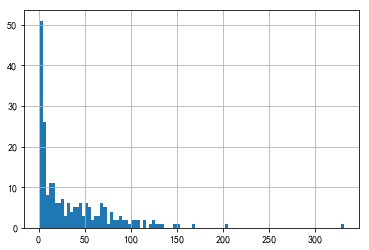

In [32]:
#两年间去图书馆次数的人数分布图
#y轴的刻度有问题
library_time2['user_id'].hist(bins=100)

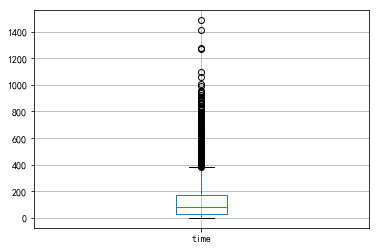

In [22]:
#在馆天数的箱型图
library_time1.boxplot(column='time')

In [33]:
#每用新表合并一次都会少很多值
time_ranking=pd.merge(library_time1,score_data,how='inner')
time_ranking.sort_values('time',ascending=False)
time_ranking.head()

,user_id,time,department,ranking
0,5617,270,4,1474
1,6956,255,17,1536
2,2824,254,5,1730
3,6957,254,17,1537
4,22153,237,16,222


In [34]:
time_ranking.to_csv('time_ranking.csv',sep=',')

In [41]:
xy1=score_data[score_data['department']==1].sort_values('ranking')
xy1.head()

,user_id,department,ranking
3307,10034,1,1
3308,10035,1,2
3309,10046,1,11
3310,10047,1,12
3311,10054,1,19


In [48]:
book_ranking1=pd.merge(xy1,borrow_group,how='inner')  
book_ranking1.head()

,user_id,department,ranking,book
0,10034,1,1,38
1,10035,1,2,29
2,10046,1,11,12
3,10047,1,12,8
4,10054,1,19,93


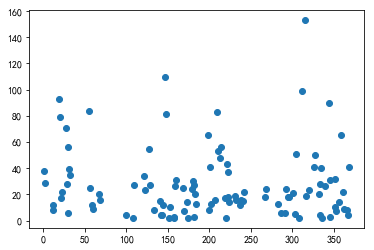

In [47]:
#学院1的读书量与成绩排名的关联性
plt.scatter(book_ranking1['ranking'],book_ranking1['book'])

In [49]:
xy2=score_data[score_data['department']==2].sort_values('ranking')
xy2.head()

,user_id,department,ranking
3297,10006,2,5
3298,10007,2,6
3299,10014,2,13
3300,10015,2,14
3301,10016,2,15


In [50]:
book_ranking2=pd.merge(xy2,borrow_group,how='inner')  
book_ranking2.head()

,user_id,department,ranking,book
0,10007,2,6,4
1,10014,2,13,17
2,10015,2,14,24
3,10016,2,15,63
4,10017,2,16,52


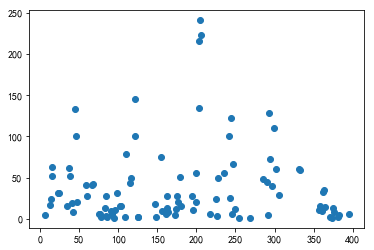

In [51]:
plt.scatter(book_ranking2['ranking'],book_ranking2['book'])

In [52]:
xy19=score_data[score_data['department']==19].sort_values('ranking')
xy19.head()

,user_id,department,ranking
5705,17236,19,5
5706,17237,19,6
5929,17956,19,9
5930,17957,19,10
5931,17962,19,15


In [53]:
book_ranking19=pd.merge(xy19,borrow_group,how='inner')  
book_ranking19.head()

,user_id,department,ranking,book
0,17236,19,5,2
1,17237,19,6,28
2,17956,19,9,11
3,17957,19,10,13
4,17962,19,15,54


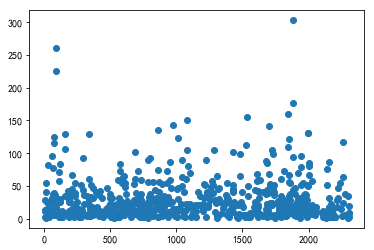

In [54]:
plt.scatter(book_ranking19['ranking'],book_ranking19['book'])

In [59]:
xy18=score_data[score_data['department']==18].sort_values('ranking')
xy18.head()

,user_id,department,ranking
3339,10160,18,7
3340,10161,18,8
3341,10166,18,13
3342,10167,18,14
3343,10172,18,19


In [56]:
book_ranking18=pd.merge(xy18,borrow_group,how='inner')  
book_ranking18.head()

,user_id,department,ranking,book
0,10160,18,7,114
1,10161,18,8,105
2,10166,18,13,2
3,10167,18,14,15
4,10172,18,19,25


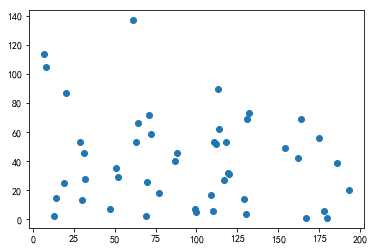

In [57]:
plt.scatter(book_ranking18['ranking'],book_ranking18['book'])